In [ ]:
from google.colab import drive 
import os
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Internship/"
os.chdir(path)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import math
import pickle
import datetime

from utilsOT import *
from algos import *

Mounted at /content/drive


# W1

In [ ]:
list_epsilon = [0.001,0.01,0.1]
list_alpha1 = [0.0005,0.0005,0.0005]
list_alpha2 = [0.001,0.005,0.05]
list_alpha3 = [0.05,0.05,0.05]
n_iter = 50000

In [ ]:
for seed in range(100):
    if seed % 10 == 0:
          print('============= from '+str(seed)+' to '+str(seed+10)+' =============')
    np.random.seed(seed)

    n_target = np.random.randint(2,20)
    np.random.randint(2,20)
    n_source = 1000

    rho_list_target = generate_list_rho(3)
    rho_list_source = generate_list_rho(3)

    X_target = sample_rho_batch(rho_list_target,n_target)
    nu = np.random.rand(n_target)
    nu = nu/np.sum(nu) 

    X_source = sample_rho_batch(rho_list_source,n_source)
    mu = np.ones(n_source)
    mu = mu/np.sum(mu)

    W1 = np.zeros([n_iter//100,len(list_epsilon)])
    W2 = np.zeros([n_iter//100,len(list_epsilon)])
    W3 = np.zeros([n_iter//100,len(list_epsilon)])

    for i_e in range(len(list_epsilon)):
        epsilon = list_epsilon[i_e]
        alpha1 = list_alpha1[i_e]
        alpha2 = list_alpha2[i_e]
        alpha3 = list_alpha3[i_e]

        t1 = datetime.datetime.now()
        W1[:,i_e] = calculate_W_list_SAG(nu,mu,X_target,X_source,epsilon,alpha1,n_iter)
        t2 = datetime.datetime.now()
        print('W1, epsilon = '+str(epsilon)+', time = '+str((t2-t1).seconds))

        t1 = datetime.datetime.now()
        W2[:,i_e] = calculate_W_list_SAG(mu,mu,X_source,X_source,epsilon,alpha2,n_iter)
        t2 = datetime.datetime.now()
        print('W2, epsilon = '+str(epsilon)+', time = '+str((t2-t1).seconds))

        t1 = datetime.datetime.now()
        W3[:,i_e] = calculate_W_list_SAG(nu,nu,X_target,X_target,epsilon,alpha3,n_iter)
        t2 = datetime.datetime.now()
        print('W3, epsilon = '+str(epsilon)+', time = '+str((t2-t1).seconds))

    np.save('permanent/result/S_chap_semi_discrete_eps_cst/W1_seed_'+str(seed)+'.npy', W1)
    np.save('permanent/result/S_chap_semi_discrete_eps_cst/W2_seed_'+str(seed)+'.npy', W2)
    np.save('permanent/result/S_chap_semi_discrete_eps_cst/W3_seed_'+str(seed)+'.npy', W3)

============= from 0 to 10 =============
W1, epsilon = 0.001, time = 30
W2, epsilon = 0.001, time = 69
W3, epsilon = 0.001, time = 5
W1, epsilon = 0.01, time = 27
W2, epsilon = 0.01, time = 63
W3, epsilon = 0.01, time = 5
W1, epsilon = 0.1, time = 27
W2, epsilon = 0.1, time = 61
W3, epsilon = 0.1, time = 5
W1, epsilon = 0.001, time = 27
W2, epsilon = 0.001, time = 69
W3, epsilon = 0.001, time = 4
W1, epsilon = 0.01, time = 27
W2, epsilon = 0.01, time = 63
W3, epsilon = 0.01, time = 4
W1, epsilon = 0.1, time = 27
W2, epsilon = 0.1, time = 65
W3, epsilon = 0.1, time = 5
W1, epsilon = 0.001, time = 27
W2, epsilon = 0.001, time = 70
W3, epsilon = 0.001, time = 4
W1, epsilon = 0.01, time = 28
W2, epsilon = 0.01, time = 64
W3, epsilon = 0.01, time = 5
W1, epsilon = 0.1, time = 27
W2, epsilon = 0.1, time = 63
W3, epsilon = 0.1, time = 4
W1, epsilon = 0.001, time = 27
W2, epsilon = 0.001, time = 65
W3, epsilon = 0.001, time = 5
W1, epsilon = 0.01, time = 27
W2, epsilon = 0.01, time = 63
W3, ep

In [ ]:
W1_all = np.zeros([100, n_iter//100, len(list_epsilon)])
W2_all = np.zeros([100, n_iter//100, len(list_epsilon)])
W3_all = np.zeros([100, n_iter//100, len(list_epsilon)])
for seed in range(100):   
    W1_all[seed,:,:] = np.load('permanent/result/S_chap_semi_discrete_eps_cst/W1_seed_'+str(seed)+'.npy')
    W2_all[seed,:,:] = np.load('permanent/result/S_chap_semi_discrete_eps_cst/W2_seed_'+str(seed)+'.npy')
    W3_all[seed,:,:] = np.load('permanent/result/S_chap_semi_discrete_eps_cst/W3_seed_'+str(seed)+'.npy')

In [ ]:
S_all = W1_all - 0.5* (W2_all + W3_all)

In [ ]:
np.save('permanent/result/S_chap_semi_discrete_eps_cst/S_all.npy',S_all)
np.save('permanent/result/S_chap_semi_discrete_eps_cst/W1_all.npy',W1_all)
np.save('permanent/result/S_chap_semi_discrete_eps_cst/W2_all.npy',W2_all)
np.save('permanent/result/S_chap_semi_discrete_eps_cst/W3_all.npy',W3_all)

In [ ]:
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/f/f9/Beep_example.ogg").play()')

# error S

In [ ]:
error_S_all = np.zeros((100,n_iter//100,len(list_epsilon)))
S_all = np.load('permanent/result/S_chap_semi_discrete_eps_cst/S_all.npy')
for seed in range(100):
    W1_theo = np.load('permanent/result/W_theo_semi_discrete/W1_theo_final_seed_'+str(seed)+'.npy')
    error_S_all[seed, :, :] = S_all[seed, :, :].copy() - W1_theo
np.save('permanent/result/S_chap_semi_discrete_eps_cst/error_S_all.npy',error_S_all)

error_S_average_all = error_S_all.mean(axis = 0)
np.save('permanent/result/S_chap_semi_discrete_eps_cst/error_S_average_all.npy',error_S_average_all)

In [ ]:
error_S_average_all.shape

(500, 3)

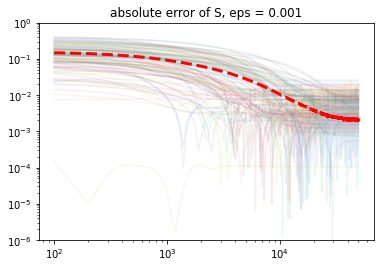

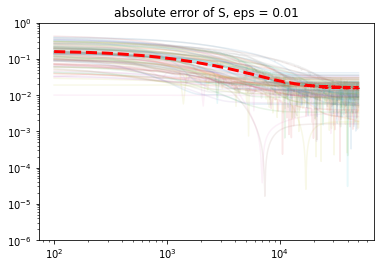

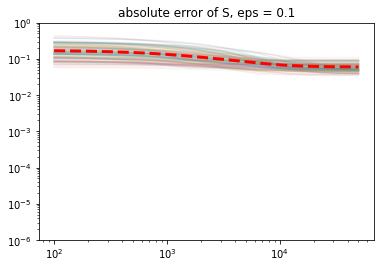

In [ ]:
error_S_all = np.load('permanent/result/S_chap_semi_discrete_eps_cst/error_S_all.npy')
error_S_average_all = np.load('permanent/result/S_chap_semi_discrete_eps_cst/error_S_average_all.npy')
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(range(100, n_iter+100, 100), np.abs(error_S_all[seed,:,i_e]), alpha=0.1)
    plt.plot(range(100, n_iter+100, 100), np.abs(error_S_average_all[:,i_e]), alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-6),10**(0)))
    plt.title('absolute error of S, eps = '+str(epsilon))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_chap_semi_discrete_eps_cst/error_S_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()

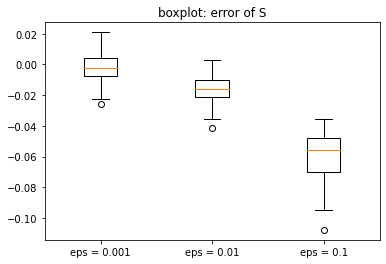

In [ ]:
plt.figure()
plt.boxplot(error_S_all[:,-1,:],labels=['eps = 0.001','eps = 0.01', 'eps = 0.1'])
plt.title('boxplot: error of S')
plt.savefig('permanent/figure/S_chap_semi_discrete_eps_cst/error_S_boxplot.png')
plt.show()
plt.close()

In [ ]:
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


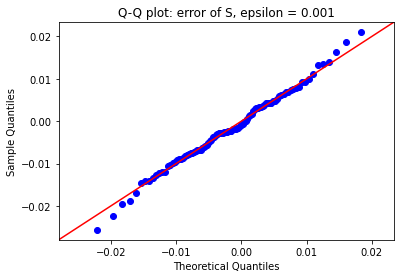

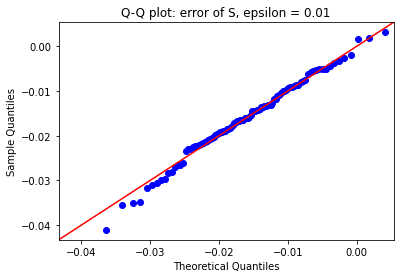

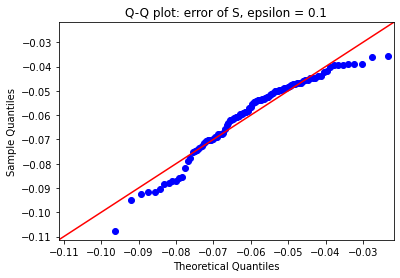

In [ ]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e] 
    std = np.std(error_S_all[:,-1,i_e])
    mean = np.mean(error_S_all[:,-1,i_e])
    fig = qqplot(error_S_all[:,-1,i_e], line='45', loc = mean, scale = std)
    plt.title('Q-Q plot: error of S, epsilon = '+str(epsilon))
    plt.savefig('permanent/figure/S_chap_semi_discrete_eps_cst/error_S_eps_'+str(epsilon)+'_qqplot.png')
    plt.show()
    plt.close()

# regret

In [ ]:
regret_S_all = (error_S_all**2).cumsum(axis = 1)
np.save('permanent/result/S_chap_semi_discrete_eps_cst/regret_S_all.npy',regret_S_all)

In [ ]:
regret_S_average_all = regret_S_all.mean(axis = 0)
np.save('permanent/result/S_chap_semi_discrete_eps_cst/regret_S_average_all.npy',regret_S_average_all)

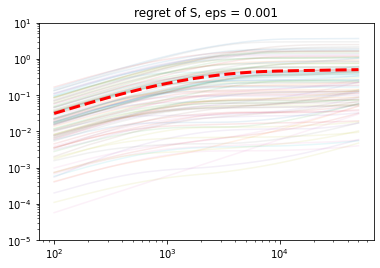

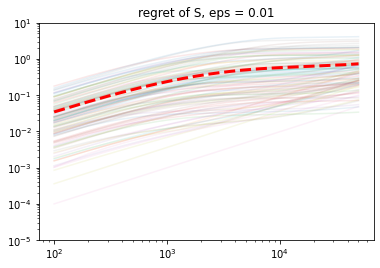

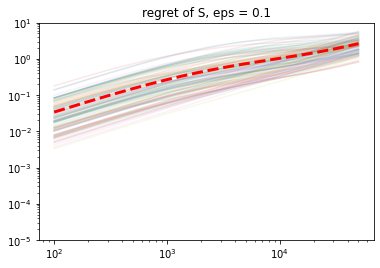

In [ ]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(range(100, n_iter+100, 100),regret_S_all[seed,:,i_e], alpha=0.1)
    plt.plot(range(100, n_iter+100, 100), regret_S_average_all[:,i_e], alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-5),10**(1)))
    plt.yscale('log')
    plt.xscale('log')
    plt.title('regret of S, eps = '+str(epsilon))
    plt.savefig('permanent/figure/S_chap_semi_discrete_eps_cst/regret_S_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()